In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
# from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [19]:
# Процедура нахождения решения 3-х диагональной матрицы
def solution(a, b):
 
    n = len(a)
    x = [0 for k in range(0, n)] # обнуление вектора решений
    # print('Размерность матрицы: ',n,'x',n)
    
    # Прямой ход
    v = [0 for k in range(0, n)]
    u = [0 for k in range(0, n)]
    # для первой 0-й строки
    v[0] = a[0][1] / (-a[0][0]) 
    u[0] = ( - b[0]) / (-a[0][0]) 
    for i in range(1, n - 1): # заполняем за исключением 1-й и (n-1)-й строк матрицы
        v[i] = a[i][i+1] / ( -a[i][i] - a[i][i-1]*v[i-1] )
        u[i] = ( a[i][i-1]*u[i-1] - b[i] ) / ( -a[i][i] - a[i][i-1]*v[i-1] )
    # для последней (n-1)-й строки
    v[n-1] = 0
    u[n-1] = (a[n-1][n-2]*u[n-2] - b[n-1]) / (-a[n-1][n-1] - a[n-1][n-2]*v[n-2])
    
    # print_arr('Прогоночные коэффициенты v: ','v', v)
    # print_arr('Прогоночные коэффициенты u: ','u', u)
    
    # Обратный ход
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
        
    return x    

In [20]:
a = 0
b = 2
T = 1

k = lambda u, x, t : u
q = lambda u, x, t : 1

f = lambda u, x, t : 0

mu_a = lambda t : 10*t**(-0.2)
mu_b = lambda t : 0

u0 = lambda x : 0

tau = 0.01
h = 0.01
M = int(T/tau) + 1
N = int((b-a)/h) + 1
U = np.zeros((M, N))
Xs = np.linspace(a, b, N)
Ts = np.linspace(0, T, M)
A = np.zeros((N,N))
B = np.zeros(N)

last_layer = np.zeros(N)

for i in range(N):
    last_layer[i] = u0(Xs[i])
    
U[0] = last_layer

for m in range(1, M):
    for i in range(5):
        A[0][0] = 1
        B[0] = mu_a(Ts[m])
        for n in range(1, N-1):
            # current_point = np.array([
            #     last_layer[n],
            #     Xs[n],
            #     Ts[m]
            # ])
            # current_point_plus_one = np.array([
            #     last_layer[n + 1],
            #     Xs[n+1],
            #     Ts[m]
            # ])
            # current_point_minus_one = np.array([
            #     last_layer[n - 1],
            #     Xs[n-1],
            #     Ts[m]
            # ])
            current_q = 1#q(current_point[0], current_point[1], current_point[2])
            current_f = 0#f(current_point[0], current_point[1], current_point[2])
            # current_plus_half_k = (k(current_point_plus_one[0], current_point_plus_one[1], current_point_plus_one[2]) + k(current_point[0], current_point[1], current_point[2]))
            # current_minus_half_k = (k(current_point_minus_one[0], current_point_minus_one[1], current_point_minus_one[2]) + k(current_point[0], current_point[1], current_point[2]))
            # factor = tau * current_q / (2 * h**2)
            # previous_coefficient = - factor * current_minus_half_k
            # next_coefficient = - factor * current_plus_half_k
            # current_coefficient = 1 - previous_coefficient - next_coefficient
            # A[n][n - 1] = previous_coefficient
            # A[n][n] = current_coefficient
            # A[n][n + 1] = next_coefficient
            C = tau / (2 * h ** 2)
            A[n][n - 1] = (-1) * C * (last_layer[n] ** N + last_layer[n-1] ** N)
            A[n][n] = 1 + C * (last_layer[n+1] ** N + 2 * last_layer[n] ** N + last_layer[n-1] ** N)
            A[n][n + 1] = (-1) * C * (last_layer[n+1] ** N + last_layer[n] ** N)
            B[n] = U[m-1][n] #+ tau * current_f
        A[-1][-1] = 1
        B[-1] = mu_b(Ts[m])
        # print(A)
        # break
        last_layer = solution(A, B)
        # last_layer = np.dot(np.linalg.inv(A), B)
    U[m] = last_layer

In [23]:
U.shape

(101, 201)

In [21]:
sh_t, sh_x = U.shape
fig = go.Figure()
fig.add_surface(
    # contours = {
    #     "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
    #     "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    # },
    x = np.linspace(a, b, sh_x),
    y = np.linspace(0, T, sh_t),
    z = U
    )
# fig.add_scatter3d(name='scat_p', x=np.linspace(a, b, sh_1), y=np.linspace(0, T, sh_0), z=U, mode='markers',
#     marker=dict(size=10, color='black',colorscale='Reds'))
# fig.update_layout(
#         scene = {
#             "xaxis": {"nticks": 20},
#             "zaxis": {"nticks": 4},
#             'camera_eye': {"x": 0, "y": -1, "z": 0.5},
#             "aspectratio": {"x": 1, "y": 1, "z": 0.2}
#         })
fig.update_layout(title='surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=5, r=50, b=5, t=55))
fig.show()

(5, 200)


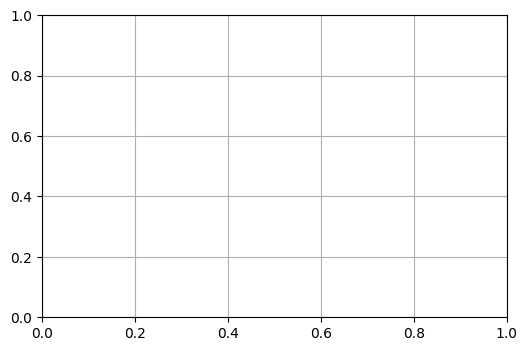

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from sympy import *

import plotly.graph_objects as go

def abcd_constants(x_plot,T,t_i, iter_layer, prev_layer):
    h = x_plot[1] - x_plot[0]
    u0 = 1
    K = -0.2
    N = 1
    x_len=len(x_plot)

    a_plot = []
    b_plot = []
    c_plot = []
    d_plot = []

    C= T / (2 * h ** 2)

    a0 = 0
    b0 = 1
    c0 = 0
    d0 = u0 * t_i ** K

    a_plot.append(a0)
    b_plot.append(b0)
    c_plot.append(c0)
    d_plot.append(d0)

    am = 0
    bm = 1
    cm = 0
    dm = 0
    for k in range(1, x_len - 1):
        ak = (-1) * C * (iter_layer[k] ** N + iter_layer[k - 1] ** N)
        bk = 1 + C * (iter_layer[k + 1] ** N + 2 * iter_layer[k] ** N + iter_layer[k - 1] ** N)
        ck = (-1) * C * (iter_layer[k + 1] ** N + iter_layer[k] ** N)
        fk = prev_layer[k]

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        d_plot.append(fk)

    a_plot.append(am)
    b_plot.append(bm)
    c_plot.append(cm)
    d_plot.append(dm)

    return a_plot, b_plot, c_plot, d_plot

def Thomas_algorithm(a_plot, b_plot, c_plot, d_plot):
    n = len(d_plot)
    y_plot = []

    A_plot = []
    B_plot = []

    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = d_plot[0] / b_plot[0]

    A_plot.append(A0)
    B_plot.append(B0)

    for i in range(1, n - 1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        A_plot.append(Ai)

    for i in range(1, n):
        Bi = (d_plot[i] - a_plot[i] * B_plot[i - 1]) / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        B_plot.append(Bi)

    An = 0
    A_plot.append(An)

    y_plot.append(B_plot[n - 1])

    for i in range(n - 2, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)

    return y_plot

def solution(x_plot, t_plot):
    u_plot = []
    T = t_plot[1] - t_plot[0]

    layer_0 = np.zeros(len(x_plot))
    u_plot.append(layer_0)

    layer_i_s = layer_0
    prev_layer = layer_0

    for t_i in t_plot[1:]:
        for s in range(0, 5):
            a_plot, b_plot, c_plot, d_plot = abcd_constants(x_plot, T, t_i, layer_i_s, prev_layer)

            layer_i_s = Thomas_algorithm(a_plot, b_plot, c_plot, d_plot)

        u_plot.append(layer_i_s)
        prev_layer = layer_i_s

    return u_plot

a = 0
b = 2
T = 1

k = lambda u, x, t : u
q = lambda u, x, t : 1

f = lambda u, x, t : 0

mu_a = lambda t : 10*t**(-0.2)
mu_b = lambda t : 0

u0 = lambda x : 0

tau = 0.01
h = 0.01
M = int(T/tau) + 1
N = int((b-a)/h) + 1
U = np.zeros((M, N))
Xs = np.linspace(a, b, N)
Ts = np.linspace(0, T, M)
A = np.zeros((N,N))
B = np.zeros(N)

# x_plot = np.linspace(0, 2, 200)
ress = []
U = np.zeros(M, N)
t = tau
while temp <= T:
    # t_plot = np.linspace(0, temp, 200)

    plt.grid()
    result = solution(Xs, Ts)[-1]
    ress.append(result)
    temp += tau

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(x_plot, ress[0], color="green")
# ax.plot(x_plot,ress[1],color="yellow")
# ax.plot(x_plot,ress[2],color="orange")
# ax.plot(x_plot,ress[3],color="red")
# ax.plot(x_plot,ress[4],color="blue")
# ax.set_title('n=1, k=-0.2')
# ax.set_xlabel('ось X')
# ax.set_ylabel('ось U')

# plt.show()

U = np.array(ress)
print(U.shape)

sh_t, sh_x = U.shape
fig = go.Figure()
fig.add_surface(
    # contours = {
    #     "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
    #     "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    # },
    x = np.linspace(0, 2, sh_x),
    y = np.linspace(0, 1, sh_t),
    z = U
    )
# fig.add_scatter3d(name='scat_p', x=np.linspace(a, b, sh_1), y=np.linspace(0, T, sh_0), z=U, mode='markers',
#     marker=dict(size=10, color='black',colorscale='Reds'))
# fig.update_layout(
#         scene = {
#             "xaxis": {"nticks": 20},
#             "zaxis": {"nticks": 4},
#             'camera_eye': {"x": 0, "y": -1, "z": 0.5},
#             "aspectratio": {"x": 1, "y": 1, "z": 0.2}
#         })
fig.update_layout(title='surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=5, r=50, b=5, t=55))
fig.show()